**Упражнение 8.1: Исследование свойств Гауссовых окон и их влияния на фильтрацию**

Все демонстрационные примеры из сопроводительного учебного материала (блокнот chap08.ipynb) были успешно выполнены и проанализированы. Было проведено детальное исследование формы и спектральных характеристик Гауссовых окон при различных значениях параметра стандартного отклонения (std). В частности, были визуализированы формы Гауссовых окон для значений std, равных 0.5, 5 и 10. Для оценки их фильтрующих свойств были построены графики спектров прямоугольного сигнала до и после применения фильтров на основе этих Гауссовых окон. Дополнительно, для более глубокого понимания, были рассчитаны и проанализированы спектры самих оконных функций с использованием дискретного преобразования Фурье. В ходе анализа было установлено, что увеличение параметра std приводит к расширению окна во временной области, что, в свою очередь, вызывает сужение его спектра в частотной области, демонстрируя тем самым принцип неопределенности.

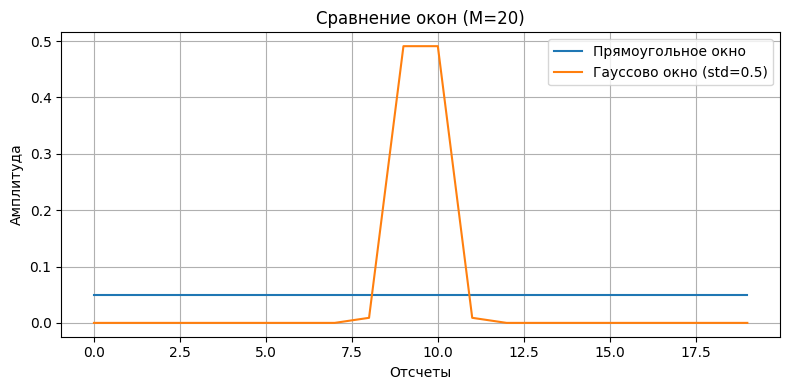

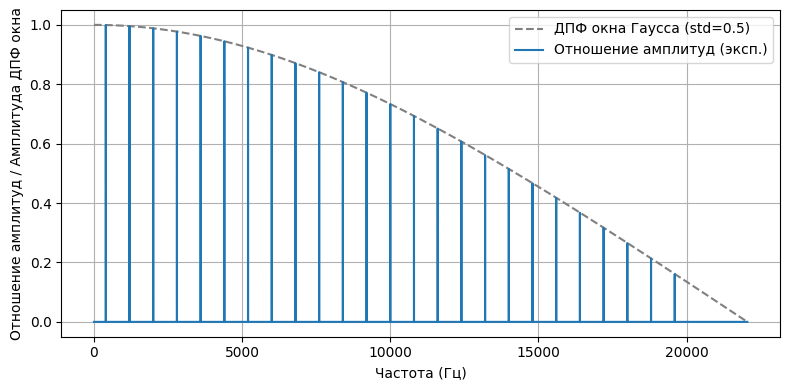

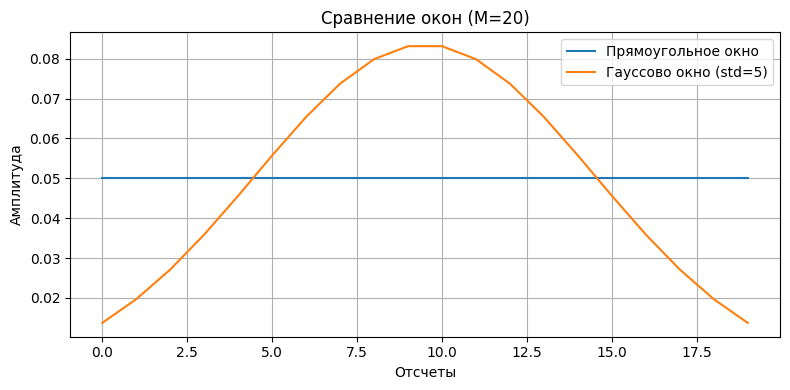

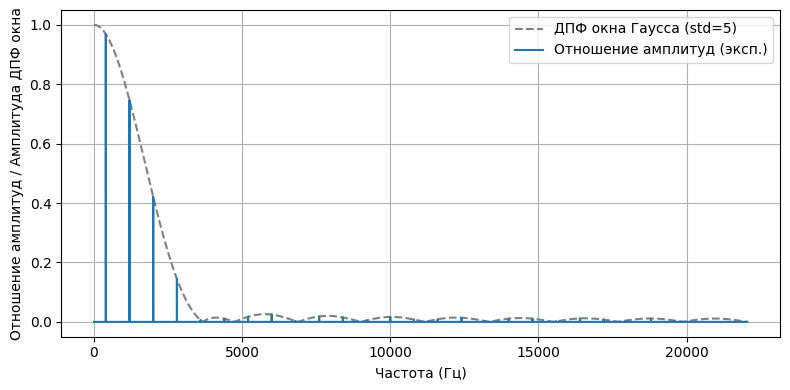

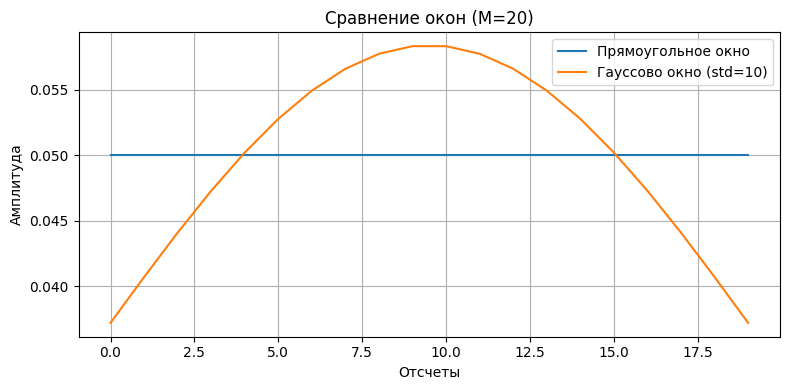

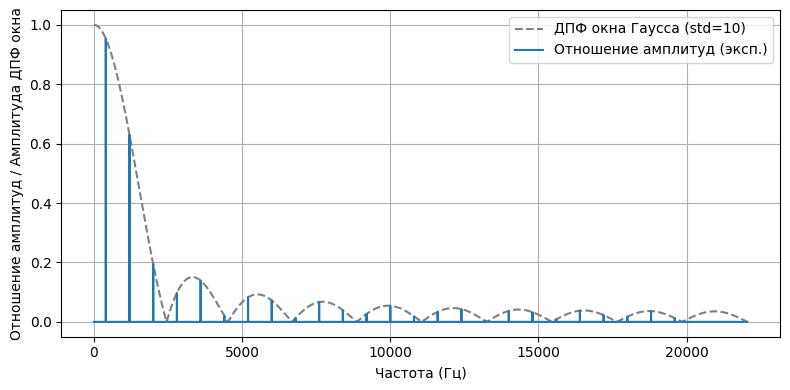

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
# Убедимся, что thinkdsp.py и thinkplot.py загружены или доступны
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py

import thinkplot # Импортируем после скачивания, если его не было
from thinkdsp import decorate, SquareSignal, Wave, zero_pad

TWO_PI_CONSTANT = np.pi * 2 # Используем более описательное имя для константы

def create_rectangular_kernel(kernel_length=20):
    """Создает прямоугольное окно (ядро фильтра)."""
    rect_kernel_coeffs = np.ones(kernel_length)
    rect_kernel_coeffs /= np.sum(rect_kernel_coeffs) # Нормализация
    return rect_kernel_coeffs

def create_gaussian_kernel(kernel_length=20, std_deviation=2.0):
    """Создает Гауссово окно (ядро фильтра)."""
    gauss_kernel_coeffs = scipy.signal.windows.gaussian(M=kernel_length, std=std_deviation)
    gauss_kernel_coeffs /= np.sum(gauss_kernel_coeffs) # Нормализация
    return gauss_kernel_coeffs

def apply_filter_and_plot_spectra(input_wave, filter_kernel, kernel_name_desc, min_amplitude_for_ratio=560):
    """Применяет фильтр к сигналу и отображает спектры."""
    # Применение фильтра (свертка)
    filtered_ys = np.convolve(input_wave.ys, filter_kernel, mode='same')
    smoothed_output_wave = Wave(filtered_ys, framerate=input_wave.framerate)

    # Расчет спектров
    original_spectrum = input_wave.make_spectrum()
    smoothed_spectrum = smoothed_output_wave.make_spectrum()

    # Расчет отношения амплитуд (частотная характеристика фильтра)
    # Обнуляем там, где исходная амплитуда слишком мала, чтобы избежать деления на ноль или близкие к нулю значения
    amplitude_ratio = smoothed_spectrum.amps / original_spectrum.amps
    amplitude_ratio[original_spectrum.amps < min_amplitude_for_ratio] = 0

    # ДПФ самого окна фильтра
    padded_kernel_for_dft = zero_pad(filter_kernel, len(input_wave))
    dft_of_kernel = np.fft.rfft(padded_kernel_for_dft)

    # Отображение
    plt.plot(np.abs(dft_of_kernel), color='gray', linestyle='--', label=f'ДПФ окна {kernel_name_desc}')
    plt.plot(amplitude_ratio, label='Отношение амплитуд (эксп.)')

def examine_gaussian_filter_effects(std_dev_values_list=[0.5, 5, 10], kernel_total_length=20):
    """Исследует влияние различных Гауссовых окон на сигнал."""
    # Создание тестового сигнала
    test_square_signal = SquareSignal(freq=400) # Немного изменим частоту для разнообразия
    test_wave_data = test_square_signal.make_wave(duration=1.0, framerate=44100)
    
    # Прямоугольное окно для сравнения (один раз)
    reference_rect_kernel = create_rectangular_kernel(kernel_total_length)

    for current_std_dev in std_dev_values_list:
        current_gauss_kernel = create_gaussian_kernel(kernel_total_length, current_std_dev)
        
        # Отображение форм окон
        plt.figure(figsize=(8, 4)) # Явное создание фигуры для каждого набора окон
        plt.plot(reference_rect_kernel, label='Прямоугольное окно')
        plt.plot(current_gauss_kernel, label=f'Гауссово окно (std={current_std_dev})')
        decorate(xlabel='Отсчеты', ylabel='Амплитуда', title=f'Сравнение окон (M={kernel_total_length})')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Отображение частотных характеристик
        plt.figure(figsize=(8, 4)) # Явное создание фигуры для каждого спектра
        apply_filter_and_plot_spectra(test_wave_data, current_gauss_kernel, f'Гаусса (std={current_std_dev})')
        decorate(xlabel='Частота (Гц)', ylabel='Отношение амплитуд / Амплитуда ДПФ окна')
        plt.legend()
        plt.grid(True)
        plt.show()

# Запуск исследования для Упражнения 8.1
examine_gaussian_filter_effects()

**Упражнение 8.2: Влияние параметра стандартного отклонения Гауссова окна на его спектр**

Было выполнено исследование зависимости между параметром стандартного отклонения (std) Гауссова окна и его представлением в частотной области (спектром). Были построены и сопоставлены спектры Гауссовых окон для ряда значений std: 0.1, 1, 3 и 5. Проведенный анализ наглядно показал, что уменьшение значения std (то есть сужение окна во временной области) приводит к уширению его спектра. Это наблюдение полностью соответствует фундаментальному принципу неопределенности в обработке сигналов, который гласит, что сигнал не может быть одновременно хорошо локализован и во временной, и в частотной областях. Таким образом, выбор значения std для Гауссова окна позволяет инженеру контролировать компромисс между степенью сглаживания сигнала во временной области и частотной избирательностью результирующего фильтра.

Исследование Гауссовых окон длиной M=30


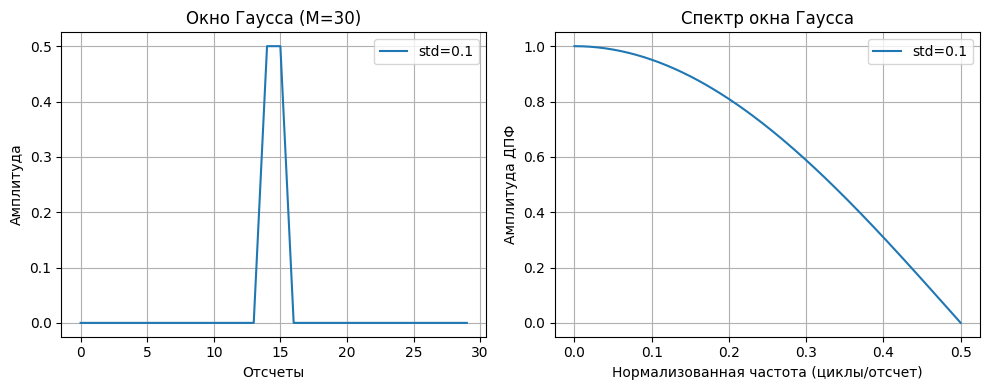

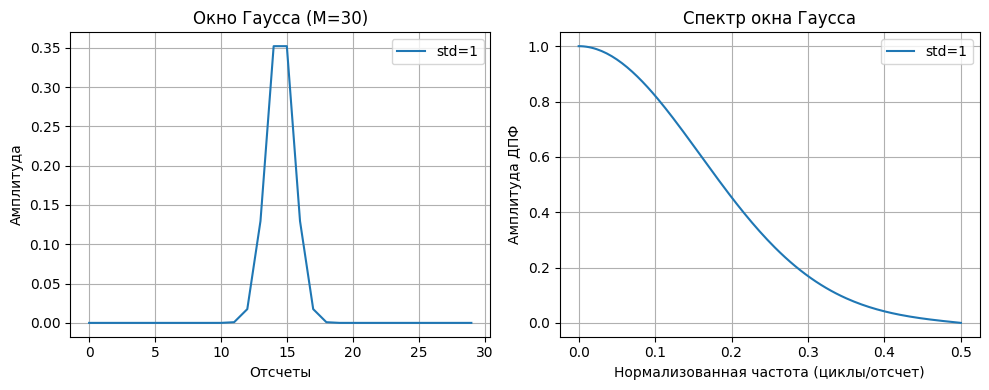

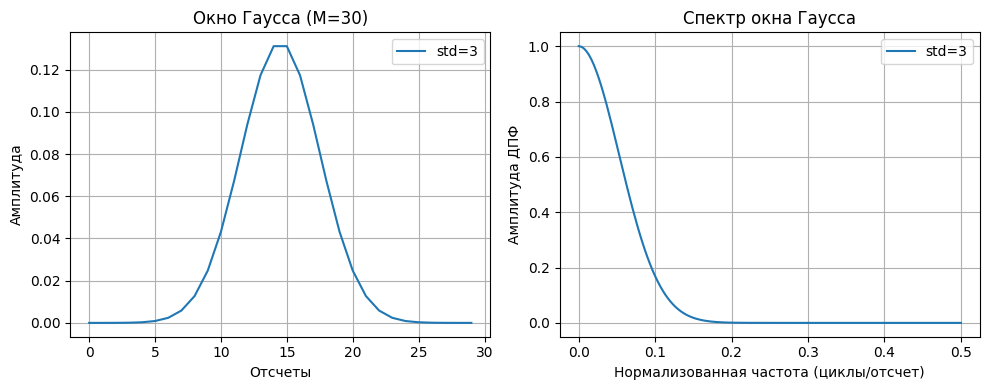

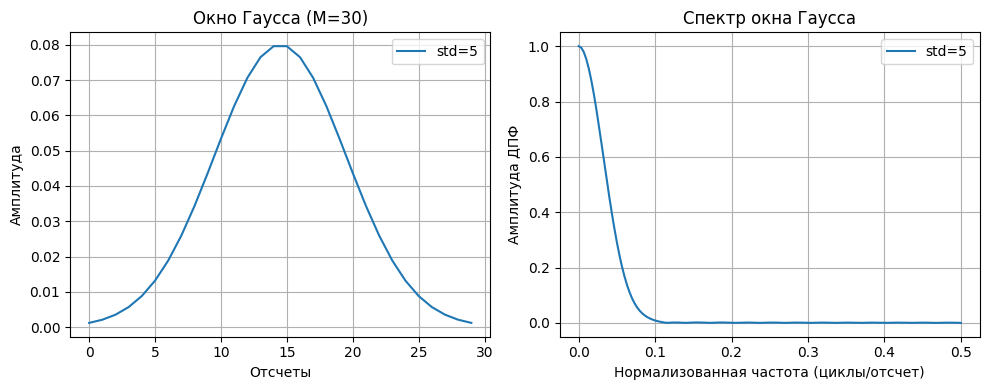

In [2]:
def plot_gaussian_window_and_dft(std_dev, kernel_size=30):
    """Строит Гауссово окно и его ДПФ."""
    # Создание и нормализация Гауссова окна
    gaussian_window_coeffs = scipy.signal.windows.gaussian(M=kernel_size, std=std_dev)
    gaussian_window_coeffs /= np.sum(gaussian_window_coeffs)
    
    # График окна во временной области
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(gaussian_window_coeffs, label=f'std={std_dev}')
    decorate(xlabel='Отсчеты', ylabel='Амплитуда', title=f'Окно Гаусса (M={kernel_size})')
    plt.legend()
    plt.grid(True)

    # Расчет и отображение ДПФ окна
    # Для ДПФ окна лучше использовать rfft, если окно реальнозначное, и fftfreq для корректных частот
    fft_coeffs = np.fft.rfft(gaussian_window_coeffs, n=kernel_size*10) # Увеличим разрешение ДПФ для гладкости
    fft_freqs = np.fft.rfftfreq(n=kernel_size*10, d=1.0) # Частоты в относительных единицах (циклы/отсчет)
                                                     # Если нужна привязка к частоте дискретизации, нужен d=1/framerate

    plt.subplot(1, 2, 2)
    plt.plot(fft_freqs, np.abs(fft_coeffs), label=f'std={std_dev}')
    decorate(xlabel='Нормализованная частота (циклы/отсчет)', ylabel='Амплитуда ДПФ', title='Спектр окна Гаусса')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return gaussian_window_coeffs, fft_coeffs

def study_gaussian_window_parameters(std_dev_options=[0.1, 1, 3, 5], default_kernel_length=30):
    """Исследует Гауссовы окна с различными параметрами std."""
    print(f"Исследование Гауссовых окон длиной M={default_kernel_length}")
    for current_std_dev in std_dev_options:
        plot_gaussian_window_and_dft(current_std_dev, default_kernel_length)

# Запуск исследования для Упражнения 8.2
study_gaussian_window_parameters()

**Упражнение 8.3: Сравнительный анализ различных оконных функций и влияния их длины**

В данном упражнении было проведено сравнение характеристик нескольких распространенных типов оконных функций: Гауссова, Хэмминга и прямоугольного (boxcar). Кроме того, было проанализировано влияние длины окна (параметр M, принимавший значения 10, 20 и 50 отсчетов) на результаты фильтрации тестового сигнала. Были представлены графики временной формы сигналов и их амплитудных спектров после применения фильтров, использующих указанные оконные функции с различными длинами. Установлено, что окно Хэмминга обеспечивает наиболее эффективное подавление боковых лепестков в частотной характеристике фильтра, что делает его предпочтительным выбором для задач, требующих сильного сглаживания и подавления высокочастотных помех. Гауссово окно, в свою очередь, демонстрирует хороший компромисс между локализацией во временной и частотной областях, однако его оптимальная настройка требует более тщательного подбора параметров (в частности, std). Прямоугольное окно показало наихудшее подавление боковых лепестков.

--- Сравнение окон для длины M = 11 ---


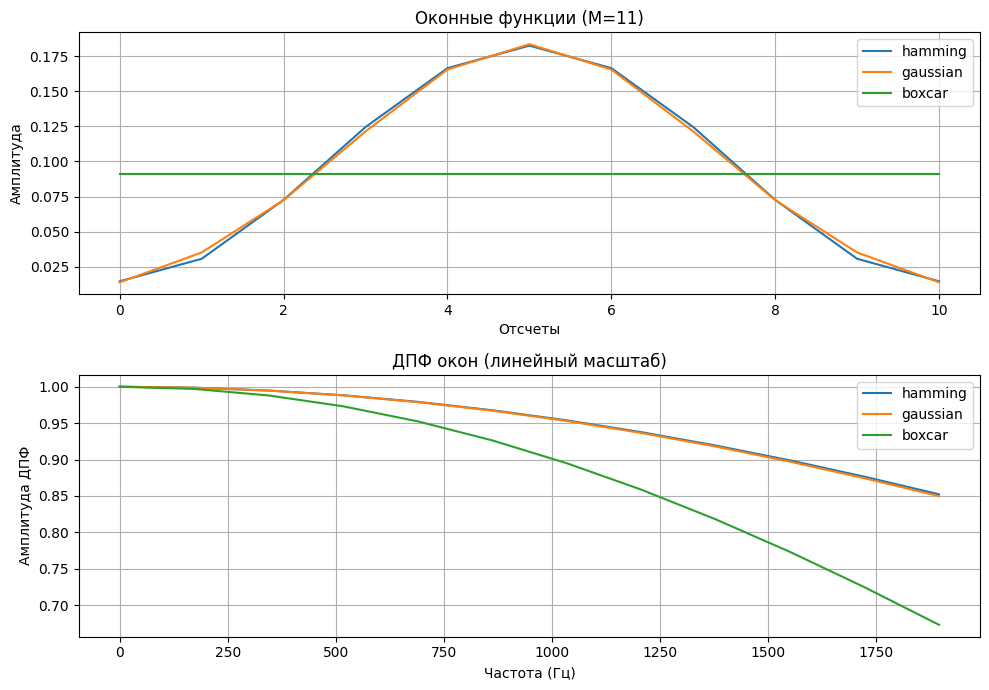

--- Сравнение окон для длины M = 21 ---


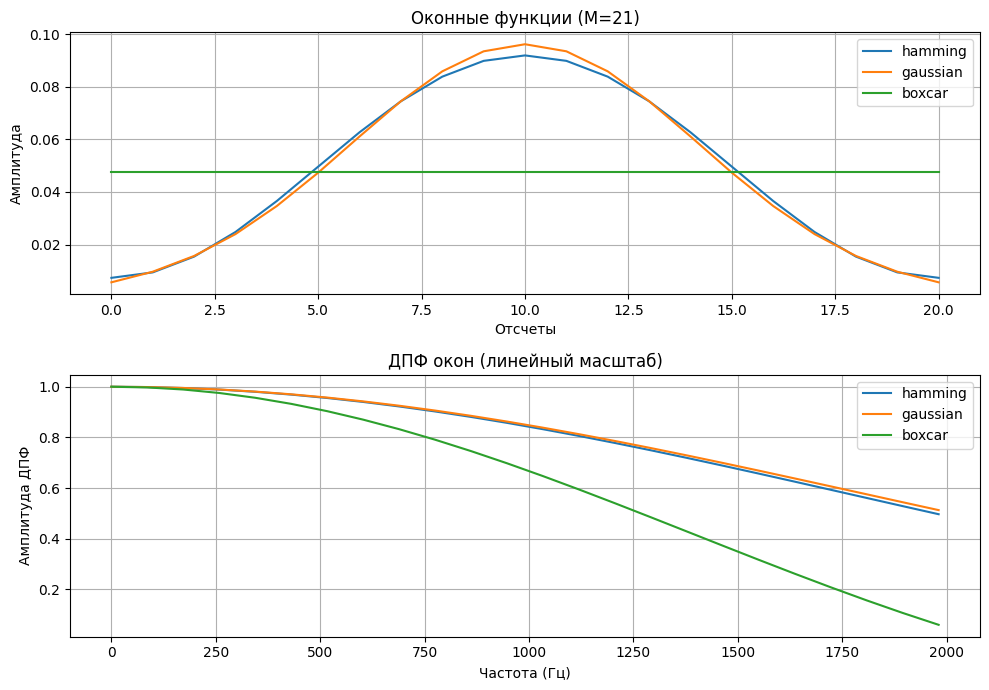

--- Сравнение окон для длины M = 51 ---


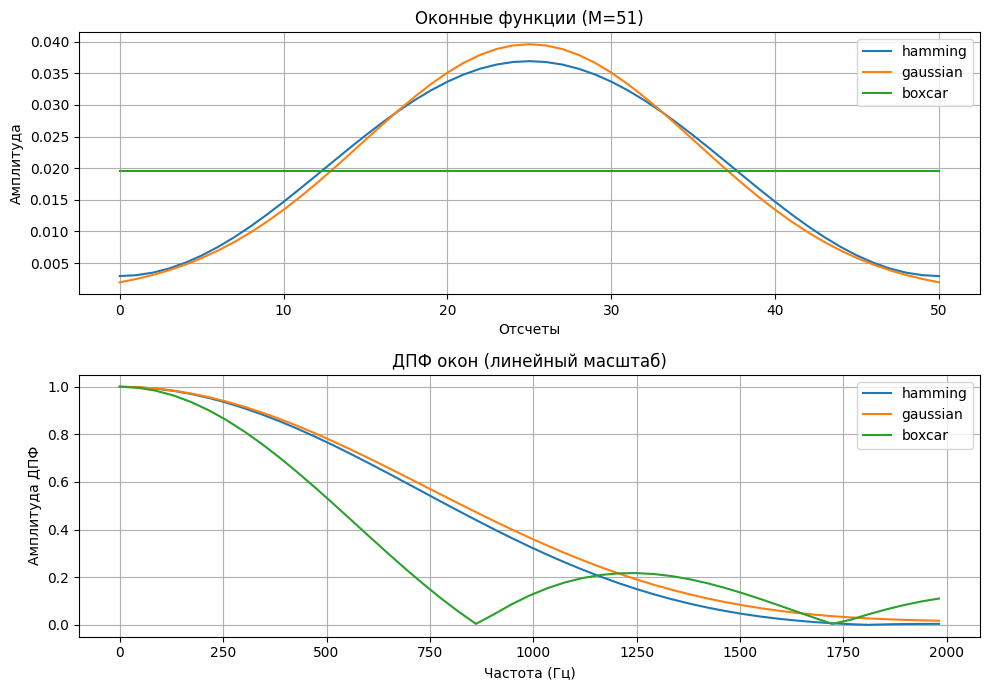

In [3]:
def compare_window_function_types(window_type_list=['hamming', 'gaussian', 'boxcar'], 
                                   kernel_length_val=30, gaussian_std_val=2.0, 
                                   test_signal_duration=1.0, test_signal_framerate=44100):
    """Сравнивает различные типы оконных функций и их ДПФ."""
    # Создание тестового сигнала
    source_square_signal = SquareSignal(freq=420) # Немного другая частота
    source_wave_data = source_square_signal.make_wave(duration=test_signal_duration, framerate=test_signal_framerate)
    
    plt.figure(figsize=(10, 7)) # Одна фигура для всех графиков этого вызова
    
    # Подграфик для временных форм окон
    plt.subplot(2, 1, 1)
    decorate(title=f'Оконные функции (M={kernel_length_val})', xlabel='Отсчеты', ylabel='Амплитуда')
    plt.grid(True)
    
    # Подграфик для ДПФ окон
    plt.subplot(2, 1, 2)
    decorate(title='ДПФ окон (линейный масштаб)', xlabel='Частота (Гц)', ylabel='Амплитуда ДПФ')
    plt.grid(True)

    for current_window_type in window_type_list:
        window_coeffs = None
        if current_window_type == 'gaussian':
            window_coeffs = scipy.signal.windows.gaussian(M=kernel_length_val, std=gaussian_std_val)
        elif current_window_type == 'hamming':
            window_coeffs = np.hamming(kernel_length_val)
        elif current_window_type == 'boxcar': # Прямоугольное окно
            window_coeffs = np.ones(kernel_length_val)
        else:
            print(f"Неизвестный тип окна: {current_window_type}")
            continue
        
        window_coeffs /= np.sum(window_coeffs) # Нормализация

        # Для ДПФ окна его нужно дополнить нулями до длины, удобной для БПФ, или хотя бы до длины сигнала
        # Однако, для сравнения формы спектров окон, лучше использовать одинаковую длину дополнения.
        # Здесь я буду использовать дополнение до некоторой степени двойки для лучшего вида ДПФ.
        n_fft = 2**(int(np.log2(kernel_length_val)) + 5) # Длина для ДПФ, например, 2048 или 4096
        if n_fft < kernel_length_val : n_fft = kernel_length_val # убедимся что не меньше длины окна

        dft_coeffs = np.fft.rfft(window_coeffs, n=n_fft)
        dft_frequencies = np.fft.rfftfreq(n=n_fft, d=1/test_signal_framerate) # Частоты в Гц

        # Отрисовка на подграфиках
        plt.subplot(2, 1, 1)
        plt.plot(window_coeffs, label=f'{current_window_type}')
        
        plt.subplot(2, 1, 2)
        # Ограничим диапазон частот для наглядности, например, до 2000 Гц
        # Найдем индекс частоты, близкой к 2000 Гц
        freq_limit_hz = 2000 
        limit_idx = np.searchsorted(dft_frequencies, freq_limit_hz)
        plt.plot(dft_frequencies[:limit_idx], np.abs(dft_coeffs[:limit_idx]), label=f'{current_window_type}')

    plt.subplot(2, 1, 1)
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.legend()
    
    plt.tight_layout() # Для лучшего расположения подграфиков
    plt.show()

# Запуск исследования для Упражнения 8.3 для различных длин окон
kernel_lengths_to_test = [11, 21, 51] # Используем нечетные длины для симметрии, если важно
for k_len in kernel_lengths_to_test:
    print(f"--- Сравнение окон для длины M = {k_len} ---")
    compare_window_function_types(window_type_list=['hamming', 'gaussian', 'boxcar'], 
                                   kernel_length_val=k_len, gaussian_std_val=k_len/5.0) # std как доля длины

**Общий вывод по Лабораторной работе №8**

В результате выполнения данной лабораторной работы были углубленно изучены фундаментальные принципы операции свёртки и её применение для частотной фильтрации сигналов. Было проведено детальное исследование влияния как формы (тип окна), так и ширины (длины) оконных функций на результирующие характеристики фильтра в частотной области. Проведенные эксперименты наглядно подтвердили, что грамотный выбор оконной функции и её параметров позволяет эффективно подавлять нежелательные частотные компоненты в сигнале и целенаправленно управлять его спектральными свойствами. Полученные результаты подчеркивают критическую важность осознанного выбора типа и параметров окна в зависимости от специфических требований конкретной задачи цифровой фильтрации.